# Machine Learning Engineer Nanodegree
## Capstone Project

## Analysis

### Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
in_file = 'train.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries
display(full_data.head(5))

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Drop the column 'Id' since it's unnecessary for the prediction process.

And also get all the column names.

In [2]:
full_data.drop("Id", axis = 1, inplace = True)

#check the data size after dropping the 'Id' variable
print("The train data size after dropping Id feature is : {} ".format(full_data.shape)) 

print(full_data.columns)

The train data size after dropping Id feature is : (1460, 80) 
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'Ga

Find feature correlations

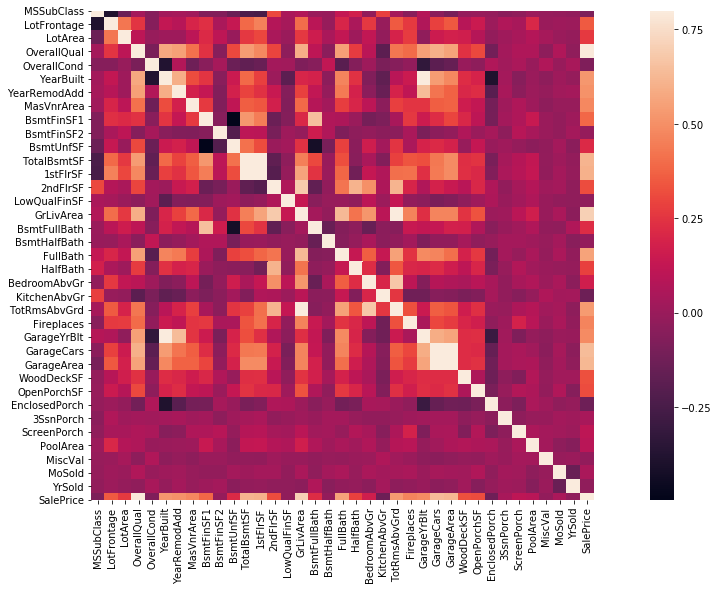

In [3]:
corrmat = full_data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

## Data Processing

### Analyze Sales Price

In [4]:
full_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


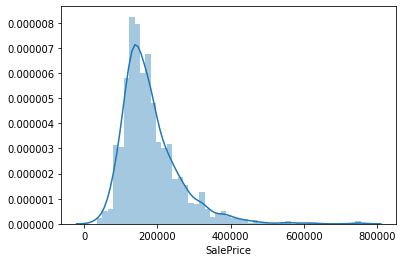

In [5]:
sns.distplot(full_data['SalePrice'])
print("Skewness: %f" % full_data['SalePrice'].skew())
print("Kurtosis: %f" % full_data['SalePrice'].kurt())

Log-transformation on the sales price

Skewness: 0.121347
Kurtosis: 0.809519


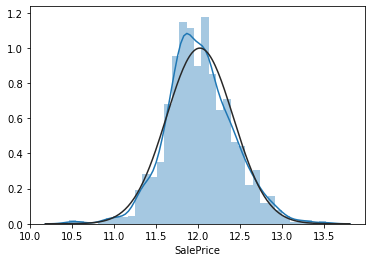

In [6]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
full_data["SalePrice"] = np.log1p(full_data["SalePrice"])

#Check the new distribution 
sns.distplot(full_data['SalePrice'] , fit=norm);

print("Skewness: %f" % full_data['SalePrice'].skew())
print("Kurtosis: %f" % full_data['SalePrice'].kurt())


### Outliers

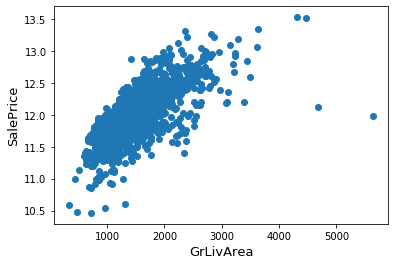

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = full_data['GrLivArea'], y = full_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Remove Outliers

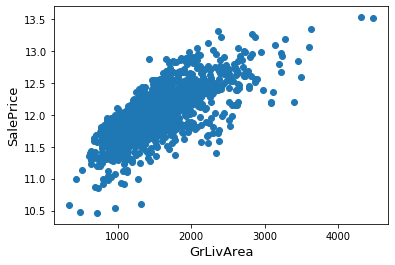

In [8]:
full_data = full_data.drop(full_data[(full_data['GrLivArea']>4000) & (full_data['SalePrice']<12.5)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(full_data['GrLivArea'], full_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### missing data

In [9]:
full_data_na = (full_data.isnull().sum() / len(full_data)) * 100
full_data_na = full_data_na.drop(full_data_na[full_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :full_data_na})
missing_data.head(20)

Missing Ratio
PoolQC            99.588477
MiscFeature       96.296296
Alley             93.758573
Fence             80.727023
FireplaceQu       47.325103
LotFrontage       17.764060
GarageYrBlt        5.555556
GarageType         5.555556
GarageFinish       5.555556
GarageQual         5.555556
GarageCond         5.555556
BsmtFinType2       2.606310
BsmtExposure       2.606310
BsmtFinType1       2.537723
BsmtCond           2.537723
BsmtQual           2.537723
MasVnrArea         0.548697
MasVnrType         0.548697
Electrical         0.068587

Filling missing data

In [10]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish',
            'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    full_data[col] = full_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    full_data[col] = full_data[col].fillna(0)

full_data["LotFrontage"] = full_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

full_data['MSZoning'] = full_data['MSZoning'].fillna(full_data['MSZoning'].mode()[0])
full_data['Electrical'] = full_data['Electrical'].fillna(full_data['Electrical'].mode()[0])
full_data['KitchenQual'] = full_data['KitchenQual'].fillna(full_data['KitchenQual'].mode()[0])
full_data['Exterior1st'] = full_data['Exterior1st'].fillna(full_data['Exterior1st'].mode()[0])
full_data['Exterior2nd'] = full_data['Exterior2nd'].fillna(full_data['Exterior2nd'].mode()[0])
full_data['SaleType'] = full_data['SaleType'].fillna(full_data['SaleType'].mode()[0])

full_data = full_data.drop(['Utilities'], axis=1)

full_data["Functional"] = full_data["Functional"].fillna("Typ")

In [11]:
full_data_na = (full_data.isnull().sum() / len(full_data)) * 100
full_data_na = full_data_na.drop(full_data_na[full_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :full_data_na})
missing_data.head(20)

Empty DataFrame
Columns: [Missing Ratio]
Index: []

### Label encoding for categorical data

In [12]:
full_data['MSSubClass'] = full_data['MSSubClass'].apply(str)
full_data['OverallCond'] = full_data['OverallCond'].astype(str)
full_data['YrSold'] = full_data['YrSold'].astype(str)
full_data['MoSold'] = full_data['MoSold'].astype(str)

In [13]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(full_data[c].values)) 
    full_data[c] = lbl.transform(list(full_data[c].values))

# shape        
print('Shape all_data: {}'.format(full_data.shape))

Shape all_data: (1458, 79)


### Add new feature

In [14]:
full_data['TotalSF'] = full_data['TotalBsmtSF'] + full_data['1stFlrSF'] + full_data['2ndFlrSF']

### Normalize skewed data

In [15]:
from scipy.stats import norm, skew
numeric_feats = full_data.dtypes[full_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = full_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
MiscVal       24.434913
PoolArea      15.932532
LotArea       12.560986
3SsnPorch     10.286510
LowQualFinSF   8.995688
LandSlope      4.805032
KitchenAbvGr   4.480268
BsmtFinSF2     4.247550
ScreenPorch    4.114690
BsmtHalfBath   4.095895

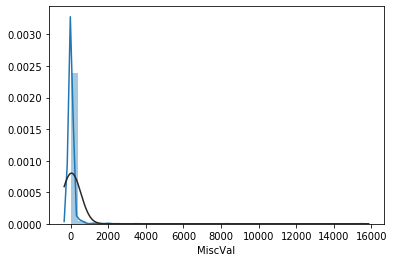

In [16]:
sns.distplot(full_data['MiscVal'] , fit=norm);

In [17]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    full_data[feat] = np.log1p(full_data[feat])

There are 60 skewed numerical features to Box Cox transform


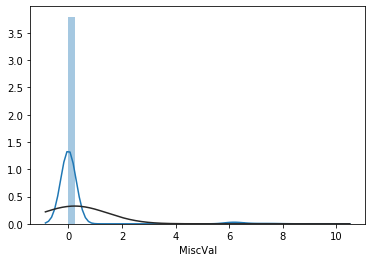

In [18]:
sns.distplot(full_data['MiscVal'] , fit=norm);

### one hot encoding

In [19]:
full_data = pd.get_dummies(full_data)
print(full_data.shape)

(1458, 221)


### split data

In [20]:
from sklearn.model_selection import train_test_split
features = full_data.drop(['SalePrice'], axis=1)
y = full_data['SalePrice']
X_train,X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)


### PCA

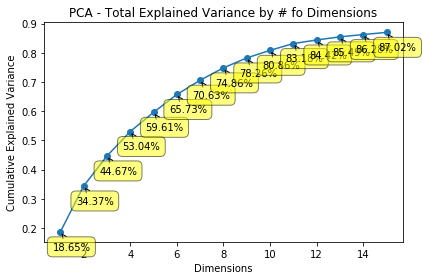

In [21]:
from sklearn.decomposition import PCA
import visuals as vs

pca = PCA(n_components=15)
trainPCA = pd.DataFrame(pca.fit_transform(X_train))
testPCA = pd.DataFrame(pca.transform(X_test))

# Generate PCA results plot
ys = pca.explained_variance_ratio_
xs = np.arange(1, len(ys)+1)
plt.plot(xs, np.cumsum(ys), '-o')
for label, x, y in zip(np.cumsum(ys), xs, np.cumsum(ys)):
    plt.annotate('{:.2f}%'.format(label * 100),
        xy=(x, y), xytext=(30, -20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Dimensions')
plt.title('PCA - Total Explained Variance by # fo Dimensions')
plt.tight_layout()
plt.savefig('PCA Cumsum.png')
plt.show()

## Implementation
### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor
from time import gmtime, strftime, time
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error

def rmse(prediction, yval):
    return np.sqrt(mean_squared_error(prediction, yval))

def DTR(Xtrain, Xtest, ytrain, ytest):
    params = {'max_depth': list(range(1, 30))}
    
    cv_sets = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    regressor = DecisionTreeRegressor()
    t0 = time()
    grid = GridSearchCV(estimator = regressor, param_grid = params,
                        scoring = 'neg_mean_squared_error', cv = cv_sets)
    
    grid = grid.fit(Xtrain, ytrain)
    test_score = rmse(grid.predict(Xtest), ytest)
    print('Time algo takes: {:.3f} seconds'.format(time() - t0))
    print('Train score: {:.4f}'.format(np.sqrt(-grid.best_score_)))
    print('Test error: {:.4f}'.format(test_score))
    
    print(grid.best_estimator_)
    pass

In [23]:
DTR(X_train,X_test, y_train, y_test)

Time algo takes: 2.687 seconds
Train score: 0.0145
Test error: 0.0152
DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [24]:
DTR(trainPCA, testPCA, y_train, y_test)

Time algo takes: 1.333 seconds
Train score: 0.0195
Test error: 0.0210
DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
def RFR(Xtrain, Xval, ytrain, yval):
    params = {'max_depth': list(range(1, 30)),
              'n_estimators': list(range(1, 30)),
              'bootstrap': [True]}

    cv_sets = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    regressor = RandomForestRegressor()
    t0 = time()
    grid = GridSearchCV(estimator = regressor, param_grid = params,
                        scoring = 'neg_mean_squared_error', cv = cv_sets)

    grid = grid.fit(Xtrain, ytrain)

    test_score = rmse(grid.predict(Xval), yval)
    print('Time algo takes: {:.3f} seconds'.format(time() - t0))
    print('Train score: {:.4f}'.format(np.sqrt(-grid.best_score_)))
    print('Test error: {:.4f}'.format(test_score))
    
    print(grid.best_estimator_)
    pass

In [26]:
RFR(X_train,X_test, y_train, y_test)

Time algo takes: 688.445 seconds
Train score: 0.0107
Test error: 0.0116
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=28,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=28,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [27]:
RFR(trainPCA, testPCA, y_train, y_test)

Time algo takes: 329.238 seconds
Train score: 0.0155
Test error: 0.0168
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=28,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


### Gradient Boost

In [39]:
def GBR(Xtrain, Xval, ytrain, yval):
    params = {'learning_rate': np.arange(0.05, 0.15, 0.01),
              'max_depth': list(range(1, 20)),
              'n_estimators': list(range(1, 20))}
    
    cv_sets = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    regressor = GradientBoostingRegressor()
    t0 = time()
    grid = GridSearchCV(estimator = regressor, param_grid = params,
                        scoring = 'neg_mean_squared_error', cv = cv_sets)
    
    grid = grid.fit(Xtrain, ytrain)

    test_score = rmse(grid.predict(Xval), yval)
    print('Time algo takes: {:.3f} seconds'.format(time() - t0))
    print('Train score: {:.4f}'.format(np.sqrt(-grid.best_score_)))
    print('Test error: {:.4f}'.format(test_score))
    
    print(grid.best_estimator_)
    #print(grid.cv_results_)
    pass

In [41]:
GBR(X_train,X_test, y_train, y_test)

Time algo takes: 5110.769 seconds
Train score: 0.0109
Test error: 0.0116
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.14, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=19,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [40]:
GBR(trainPCA, testPCA, y_train, y_test)

Time algo takes: 1002.493 seconds
Train score: 0.0158
Test error: 0.0175
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.14, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=19,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [49]:
def GBR(Xtrain, Xval, ytrain, yval):
    params = {'learning_rate': np.arange(0.1, 0.2, 0.01),
              'max_depth': list(range(1, 10, 2)),
              'n_estimators': list(range(100, 152, 10))}
    
    cv_sets = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    regressor = GradientBoostingRegressor()
    t0 = time()
    grid = GridSearchCV(estimator = regressor, param_grid = params,
                        scoring = 'neg_mean_squared_error', cv = cv_sets)
    
    grid = grid.fit(Xtrain, ytrain)

    test_score = rmse(grid.predict(Xval), yval)
    print('Time algo takes: {:.3f} seconds'.format(time() - t0))
    print('Train score: {:.4f}'.format(np.sqrt(-grid.best_score_)))
    print('Test error: {:.4f}'.format(test_score))
    
    print(grid.best_estimator_)
    #print(grid.cv_results_)
    pass

In [48]:
GBR(trainPCA, testPCA, y_train, y_test)

Time algo takes: 2022.305 seconds
Train score: 0.0151
Test error: 0.0165
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.13999999999999999, loss='ls',
                          max_depth=5, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=131,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [59]:
GBR(X_train,X_test, y_train, y_test)

Time algo takes: 1139.105 seconds
Train score: 0.0098
Test error: 0.0100
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.14999999999999997, loss='ls',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


### Free-Form Visualization

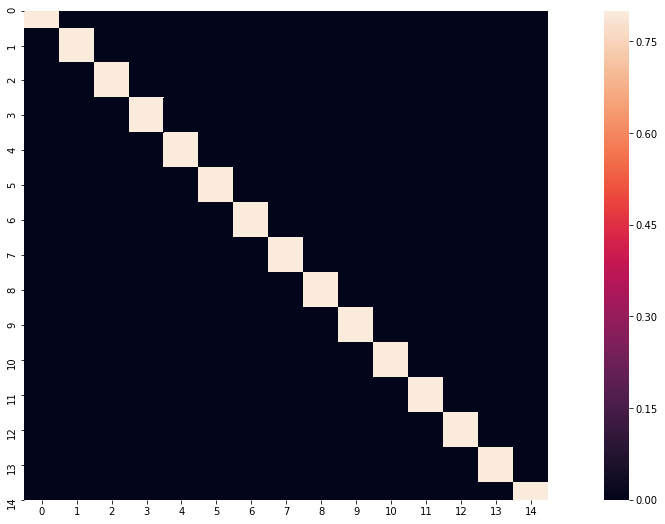

In [60]:
pca_corrmat = trainPCA.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(pca_corrmat, vmax=0.8, square=True)

### Validation

In [66]:
for i in range(10):
    my_model = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                              learning_rate=0.15, loss='ls',
                              max_depth=3, max_features=None, max_leaf_nodes=None,
                              min_impurity_decrease=0.0, min_impurity_split=None,
                              min_samples_leaf=1, min_samples_split=2,
                              min_weight_fraction_leaf=0.0, n_estimators=150,
                              n_iter_no_change=None, presort='auto',
                              random_state=i, subsample=1.0, tol=0.0001,
                              validation_fraction=0.1, verbose=0, warm_start=False)
    my_model.fit(X_train, y_train)
    test_score = rmse(my_model.predict(X_test), y_test)
    print(test_score)

0.009944972390274608
0.00996925080706154
0.01004156224074419
0.009989985802067855
0.009958992912307698
0.00995790759286781
0.009938821580428851
0.009987389356793629
0.01004557859526823
0.010069522645681336


In [67]:
def GBR_different_CV(Xtrain, Xval, ytrain, yval):
    params = {'learning_rate': np.arange(0.1, 0.2, 0.01),
              'max_depth': list(range(1, 10, 2)),
              'n_estimators': list(range(100, 152, 10))}
    
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.25, random_state = 10)
    regressor = GradientBoostingRegressor()
    t0 = time()
    grid = GridSearchCV(estimator = regressor, param_grid = params,
                        scoring = 'neg_mean_squared_error', cv = cv_sets)
    
    grid = grid.fit(Xtrain, ytrain)

    test_score = rmse(grid.predict(Xval), yval)
    print('Time algo takes: {:.3f} seconds'.format(time() - t0))
    print('Train score: {:.4f}'.format(np.sqrt(-grid.best_score_)))
    print('Test error: {:.4f}'.format(test_score))
    
    print(grid.best_estimator_)
    #print(grid.cv_results_)
    pass

In [68]:
GBR_different_CV(X_train,X_test, y_train, y_test)

Time algo takes: 2122.320 seconds
Train score: 0.0097
Test error: 0.0097
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.11, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
